In [1]:
import os
import datetime
import numpy as np
import pandas as pd


try:
    import matplotlib.pyplot as plt
    """
    the output of plotting commands is displayed inline within frontends like the Jupyter notebook,
    directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
    """
    %matplotlib inline
except:
    pass

### merge and pre-process data

In [2]:
files = os.listdir('data')
print("There are {} csv files:".format(len(files)))
for name in files:
    print(name[:-4])

There are 31 csv files:
AAPL
AXP
BA
CAT
CSCO
CVX
DIS
DWDP
GS
HD
IBM
INTC
JNJ
JPM
KO
MCD
MMM
MRK
MSFT
NKE
PFE
PG
TRV
UNH
UTX
V
VZ
WBA
WMT
XOM
^DJI


In [3]:
dow_jones = pd.read_csv('data/^DJI.csv')
aapl = pd.read_csv('data/AAPL.csv')

In [4]:
print("dimensions of Dow Jones Industrial Average: ", dow_jones.shape)
dow_jones.head()

dimensions of Dow Jones Industrial Average:  (2518, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-11-24,8048.089844,8599.019531,8048.089844,8443.389648,8443.389648,491890000
1,2008-11-25,8445.139648,8607.379883,8281.459961,8479.469727,8479.469727,374020000
2,2008-11-26,8464.490234,8726.610352,8311.169922,8726.610352,8726.610352,283920000
3,2008-11-28,8724.700195,8831.349609,8672.690430,8829.040039,8829.040039,155510000
4,2008-12-01,8826.889648,8827.049805,8141.359863,8149.089844,8149.089844,321010000


In [5]:
print("dimensions of Dow Jones components: ", aapl.shape)
aapl.tail()

dimensions of Dow Jones components:  (2518, 6)


,date,close,volume,open,high,low
2513,12/1/2008,12.7043,230862519,13.0429,13.1814,12.7033
2514,11/28/2008,13.2386,75301403,13.5286,13.5371,13.1229
2515,11/26/2008,13.5714,224858127,12.8457,13.6071,12.8357
2516,11/25/2008,12.9714,308776603,13.5186,13.5300,12.5943
2517,11/24/2008,13.2786,360468748,12.1729,13.5414,12.1200


In [6]:
aapl['Date'] = pd.to_datetime(aapl.date)
aapl = aapl.sort_values(by=['Date'])
aapl.head()

,date,close,volume,open,high,low,Date
2517,11/24/2008,13.2786,360468748,12.1729,13.5414,12.1200,2008-11-24
2516,11/25/2008,12.9714,308776603,13.5186,13.5300,12.5943,2008-11-25
2515,11/26/2008,13.5714,224858127,12.8457,13.6071,12.8357,2008-11-26
2514,11/28/2008,13.2386,75301403,13.5286,13.5371,13.1229,2008-11-28
2513,12/1/2008,12.7043,230862519,13.0429,13.1814,12.7033,2008-12-01


In [7]:
asset_prices = pd.DataFrame(columns=['AAPL','AXP','BA','CAT','CSCO','CVX','DIS','DWDP','GS','HD',
                                    'IBM','INTC','JNJ','JPM','KO','MCD','MMM','MRK','MSFT','NKE',
                                    'PFE','PG','TRV','UNH','UTX','V','VZ','WBA','WMT','XOM',
                                    'DJI'],
                           index=dow_jones.Date)
# special cases
asset_prices.AAPL = np.array(aapl.close)
asset_prices.DJI = np.array(dow_jones['Adj Close'])
dwdp = pd.read_csv('data/DWDP.csv')
asset_prices.DWDP = np.array(dwdp['Adj Close'])
mrk = pd.read_csv('data/MRK.csv')
asset_prices.MRK = np.array(mrk['Adj Close'])

In [8]:
files_left = sorted(list(set(files) - set(['AAPL.csv', 'DWDP.csv', 'MRK.csv', '^DJI.csv'])))
print(len(files_left), files_left)

27 ['AXP.csv', 'BA.csv', 'CAT.csv', 'CSCO.csv', 'CVX.csv', 'DIS.csv', 'GS.csv', 'HD.csv', 'IBM.csv', 'INTC.csv', 'JNJ.csv', 'JPM.csv', 'KO.csv', 'MCD.csv', 'MMM.csv', 'MSFT.csv', 'NKE.csv', 'PFE.csv', 'PG.csv', 'TRV.csv', 'UNH.csv', 'UTX.csv', 'V.csv', 'VZ.csv', 'WBA.csv', 'WMT.csv', 'XOM.csv']


In [9]:
for name in files_left:
    df = pd.read_csv('data/'+name)
    df['Date'] = pd.to_datetime(df.date)
    df = df.sort_values(by=['Date'])
    asset_prices[name[:-4]] = np.array(df.close)

In [10]:
#asset_prices.to_csv('data/close.csv')
asset_prices.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2008-11-24,13.2786,21.18,40.75,36.34,16.40,74.30,22.20,13.190079,67.42,21.42,...,64.68,40.62,19.07,49.11,12.4300,27.7794,24.13,52.77,78.80,8443.389648
2008-11-25,12.9714,21.37,40.18,37.27,15.42,76.53,22.03,13.146806,71.78,22.25,...,63.18,40.45,20.73,47.13,12.3825,28.5736,23.81,54.68,78.11,8479.469727
2008-11-26,13.5714,22.30,41.28,39.33,16.39,79.93,22.50,13.644410,76.50,23.55,...,63.16,42.78,20.98,47.73,13.0000,30.4051,24.57,56.69,80.89,8726.610352
2008-11-28,13.2386,23.31,42.63,40.99,16.54,79.01,22.52,13.377581,78.99,23.11,...,64.35,43.65,21.01,48.53,13.1400,30.5078,24.74,55.88,80.15,8829.040039
2008-12-01,12.7043,19.64,39.88,36.58,14.96,72.02,20.33,12.930458,65.76,21.21,...,60.49,37.01,20.12,45.62,12.0125,28.6577,23.06,53.01,74.31,8149.089844


In [11]:
asset_prices.tail()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-16,193.53,109.46,335.95,129.96,46.35,119.06,116.19,59.189999,202.12,177.02,...,93.82,128.77,271.11,130.13,140.18,60.21,82.52,97.69,78.96,25413.220703
2018-11-19,185.86,108.25,320.94,125.98,45.75,119.42,115.42,57.799999,198.22,173.59,...,93.29,130.52,266.05,127.85,134.76,60.62,81.92,96.78,79.22,25017.439453
2018-11-20,176.98,106.09,317.70,122.27,44.49,116.10,111.87,56.369999,191.34,169.05,...,92.10,128.37,261.50,126.00,133.37,59.46,79.79,94.16,76.97,24465.640625
2018-11-21,176.78,106.50,317.32,123.87,44.89,117.57,113.03,56.970001,192.60,169.30,...,91.41,127.76,260.55,125.71,134.42,59.16,79.76,94.17,77.56,24464.689453
2018-11-23,172.29,105.74,312.32,122.32,44.54,113.60,112.08,56.430000,189.10,168.85,...,91.54,126.60,261.62,129.04,132.87,58.64,80.81,95.10,75.49,24285.949219


### calculate log-returns

In [12]:
np.log(asset_prices.shift(1)).head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2008-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-25,2.586154,3.053057,3.707456,3.592919,2.797281,4.308111,3.100092,2.579465,4.210942,3.064325,...,4.169452,3.704261,2.948116,3.894063,2.520113,3.324295,3.183456,3.965943,4.366913,9.041139
2008-11-26,2.562747,3.061988,3.693369,3.618189,2.735665,4.337683,3.092405,2.576179,4.273606,3.102342,...,4.145988,3.700067,3.031582,3.852910,2.516284,3.352483,3.170106,4.001498,4.358118,9.045403
2008-11-28,2.607965,3.104587,3.720378,3.671988,2.796671,4.381151,3.113515,2.613330,4.337291,3.159126,...,4.145671,3.756071,3.043570,3.865560,2.564949,3.414610,3.201526,4.037598,4.393090,9.074132
2008-12-01,2.583137,3.148882,3.752558,3.713328,2.805782,4.369574,3.114404,2.593580,4.369321,3.140265,...,4.164337,3.776203,3.044999,3.882182,2.575661,3.417982,3.208421,4.023207,4.383900,9.085802


In [13]:
asset_returns = (np.log(asset_prices) - np.log(asset_prices.shift(1))).iloc[1:,:]
asset_returns.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2008-11-25,-0.023407,0.008931,-0.014086,0.025270,-0.061616,0.029572,-0.007687,-0.003286,0.062664,0.038017,...,-0.023464,-0.004194,0.083466,-0.041153,-0.003829,0.028188,-0.013350,0.035555,-0.008795,0.004264
2008-11-26,0.045218,0.042599,0.027009,0.053799,0.061006,0.043468,0.021110,0.037151,0.063685,0.056784,...,-0.000317,0.056004,0.011988,0.012650,0.048665,0.062127,0.031421,0.036100,0.034972,0.028729
2008-11-28,-0.024828,0.044296,0.032180,0.041341,0.009110,-0.011577,0.000888,-0.019750,0.032031,-0.018860,...,0.018666,0.020133,0.001429,0.016622,0.010712,0.003372,0.006895,-0.014391,-0.009190,0.011669
2008-12-01,-0.041196,-0.171314,-0.066683,-0.113826,-0.100402,-0.092631,-0.102306,-0.033995,-0.183310,-0.085793,...,-0.061859,-0.165015,-0.043284,-0.061836,-0.089713,-0.062560,-0.070322,-0.052726,-0.075654,-0.080140
2008-12-02,0.039034,0.055460,0.020353,0.038085,0.023779,0.047718,0.054093,0.036687,-0.011624,0.029728,...,0.015583,0.081683,0.009891,0.009599,0.033360,0.046508,0.025264,0.008266,0.043451,0.032595


In [14]:
len(asset_returns)

2517

### standarize the data

In [15]:
from sklearn.preprocessing import StandardScaler

# standardize the log-returns: mean = 0, sigma = 1
standardized_asset_returns = StandardScaler().fit_transform(asset_returns.values)
standardized_asset_returns = pd.DataFrame(data=standardized_asset_returns,
                                         index=asset_returns.index,
                                         columns=asset_returns.columns.values)
standardized_asset_returns.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2008-11-25,-1.445093,0.396634,-0.889603,1.265145,-3.665218,2.054946,-0.548920,-0.174158,3.021673,2.634596,...,-2.322957,-0.329397,4.809265,-3.132900,-0.288499,2.391016,-0.851898,3.076640,-0.702885,0.386361
2008-11-26,2.615029,2.007100,1.564708,2.721270,3.582246,3.026156,1.348636,1.648613,3.071214,3.963832,...,-0.044742,3.938999,0.638740,0.925204,2.886417,5.300415,1.905802,3.124082,2.801750,2.845141
2008-11-28,-1.529168,2.088282,1.873554,2.085400,0.514995,-0.820876,0.016158,-0.916279,1.534793,-1.393961,...,1.823522,1.395496,0.022666,1.224764,0.590927,0.263622,0.395138,-1.273933,-0.734548,1.130597
2008-12-01,-2.497597,-8.225179,-4.030817,-5.834290,-5.957616,-6.485605,-6.783712,-1.558393,-8.917270,-6.134697,...,-6.101799,-11.732583,-2.586213,-4.692911,-5.482933,-5.388432,-4.361125,-4.613063,-6.056640,-8.096405
2008-12-02,2.249151,2.622298,1.167218,1.919213,1.381987,3.323185,3.522003,1.627677,-0.584111,2.047511,...,1.520117,5.759812,0.516421,0.695029,1.960754,3.961485,1.526560,0.699630,3.480675,3.233719


In [16]:
print("mean of AAPL before and after standardization: ", asset_returns.AAPL. mean(), standardized_asset_returns.AAPL.mean())
print("std of AAPL before and after standardization: ", asset_returns.AAPL. std(), standardized_asset_returns.AAPL.std())

mean of AAPL before and after standardization:  0.0010182858111799883 -4.410897992153979e-18
std of AAPL before and after standardization:  0.01690543258877368 1.0001987083973913


### insights of data by plotting correlations

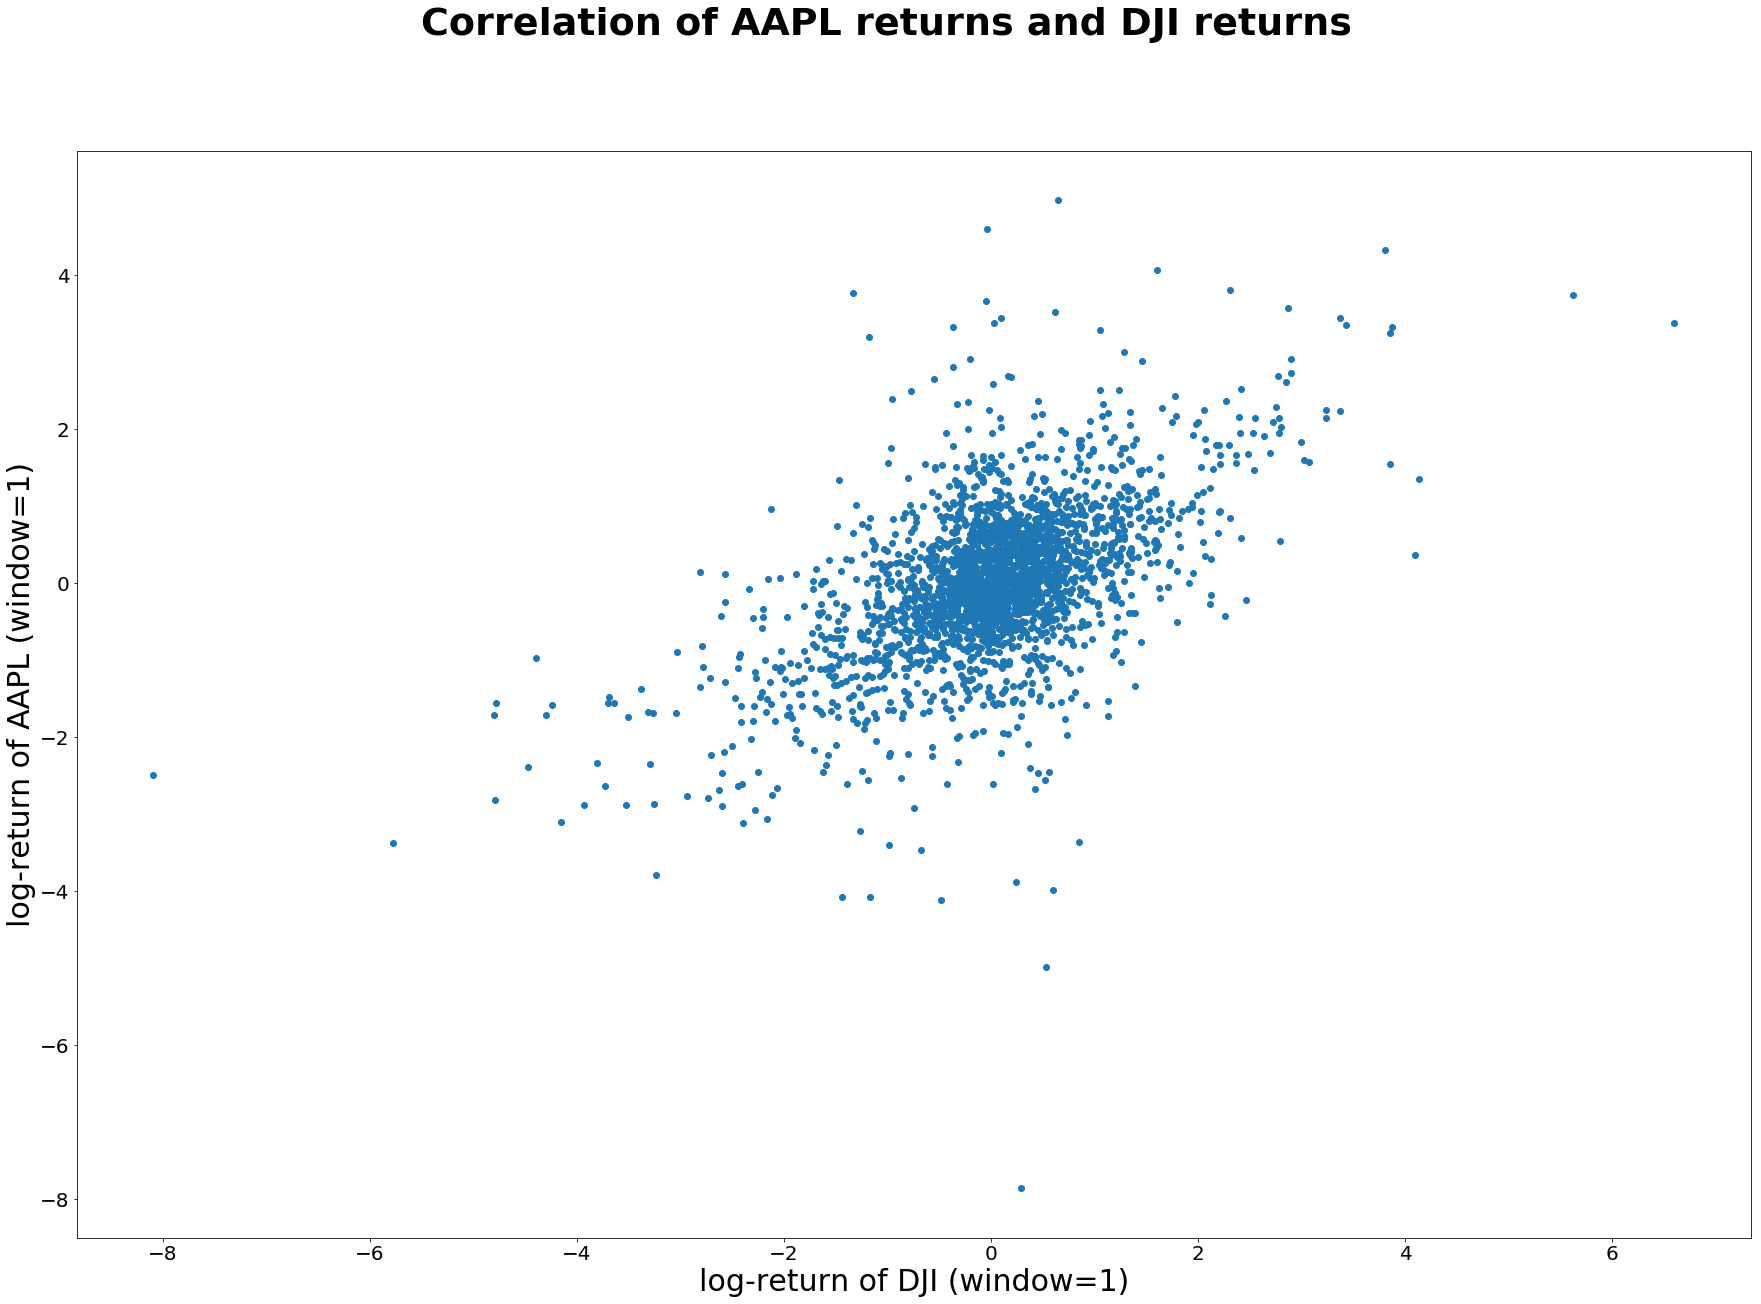

In [17]:
fig, ax_list = plt.subplots(1, 1, figsize=(30,20))
plt.suptitle("Correlation of AAPL returns and DJI returns", fontsize = 38, fontweight='bold')
ax_list.scatter(standardized_asset_returns['DJI'].values.reshape((2517, 1)), standardized_asset_returns['AAPL'].values.reshape((2517, 1)))
plt.xlabel("log-return of DJI (window=1)", fontsize=30)
plt.ylabel("log-return of AAPL (window=1)", fontsize=30)
ax_list.tick_params(labelsize=20)
plt.show()

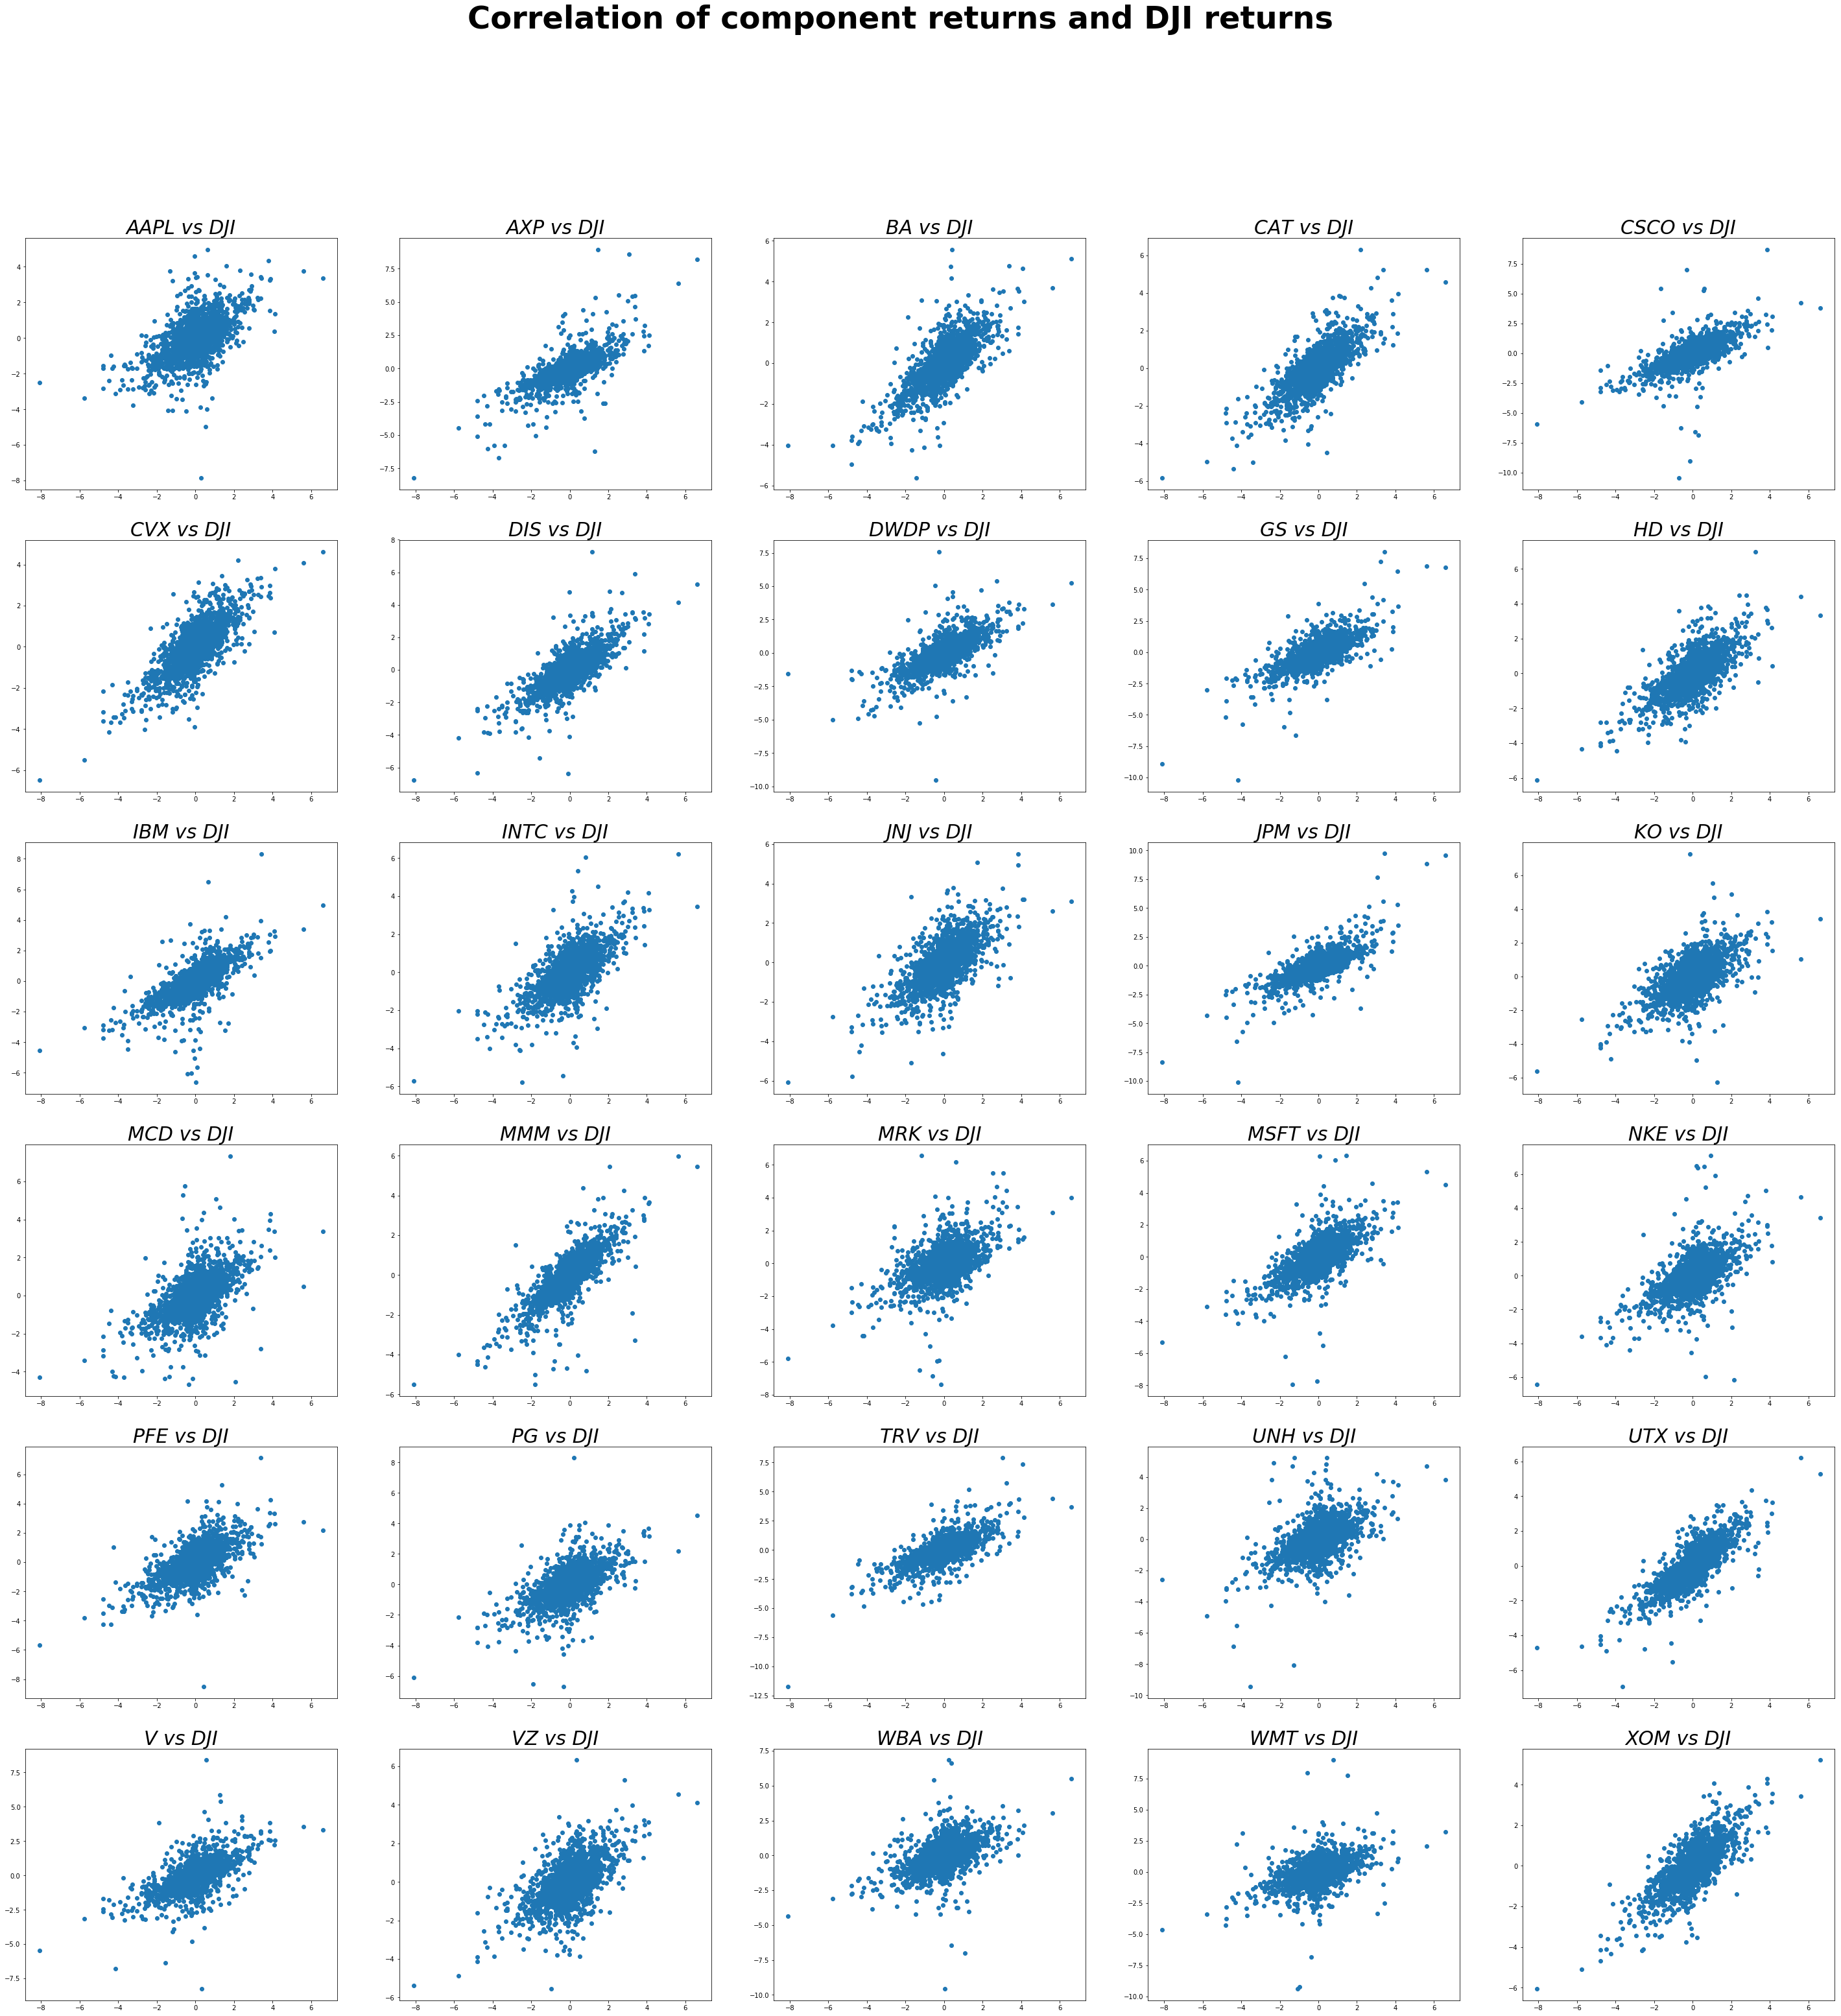

In [18]:
fig, ax_list = plt.subplots(6, 5, figsize=(50,50))
plt.suptitle("Correlation of component returns and DJI returns", fontsize = 48, fontweight='bold')

dji = standardized_asset_returns['DJI'].values.reshape((2517, 1))
column_names = standardized_asset_returns.columns.values
for i in range(standardized_asset_returns.shape[1]-1):
    ax_list[int(i/5)][i%5].set_title('{} vs DJI'.format(column_names[i]), fontstyle='italic', fontsize = 30)
    ax_list[int(i/5)][i%5].scatter(dji, standardized_asset_returns.iloc[:,i].values.reshape((2517, 1)))
plt.show()

### split into training and testing data set

In [19]:
train_percentage = 0.7

df_train = standardized_asset_returns.iloc[:int(standardized_asset_returns.shape[0]*0.7), :]
df_test = standardized_asset_returns.iloc[int(standardized_asset_returns.shape[0]*0.7):, :]
print("dimensions of training set: ", df_train.shape)
print("dimensions of testing set: ", df_test.shape)
df_train.tail()

dimensions of training set:  (1761, 31)
dimensions of testing set:  (756, 31)


,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-17,-0.312104,-0.399105,0.634227,-0.754911,0.020647,-0.333504,0.076877,-0.026031,-0.423175,3.004688,...,-0.314663,-0.126301,0.230761,-0.245132,-0.110615,0.050653,0.815087,3.011840,-0.934494,-0.004883
2015-11-18,1.784146,0.663958,0.844407,0.654906,0.656030,0.888338,1.088354,1.272899,0.760811,0.143691,...,1.068625,1.177728,1.380161,0.094660,1.180917,0.543151,1.154220,1.435601,0.778700,1.370988
2015-11-19,0.686617,0.359009,0.337088,-0.242824,0.518882,-1.065635,0.274770,0.109435,-0.178044,0.120788,...,0.400497,0.177885,-3.451672,0.425117,-0.290408,0.689405,-1.317398,-0.349810,-0.436203,-0.067178
2015-11-20,0.198201,-0.241454,0.015671,0.785331,0.406858,-1.426396,0.708230,-0.026031,-0.413744,1.788012,...,-0.531452,0.465564,1.160557,-0.090357,-0.026755,-0.721408,-0.777747,-0.929159,-0.508826,0.472587
2015-11-23,-0.833974,-0.149597,-0.473567,-0.110779,-0.324355,0.769010,-0.400072,-0.297375,-0.601335,1.176738,...,0.180940,-0.154561,-0.480565,-0.128844,-0.117300,-0.784249,0.030611,0.254693,0.491610,-0.217875


### building CAMP linear regression model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

tickers = standardized_asset_returns.columns.values[:-1]
lr = LinearRegression()
alphas = [0.] * len(tickers)
betas = [0.] * len(tickers)
r2_in_sample = [0.] * len(tickers)
r2_out_sample = [0.] * len(tickers)
tickers

array(['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DWDP', 'GS',
       'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WBA',
       'WMT', 'XOM'], dtype=object)

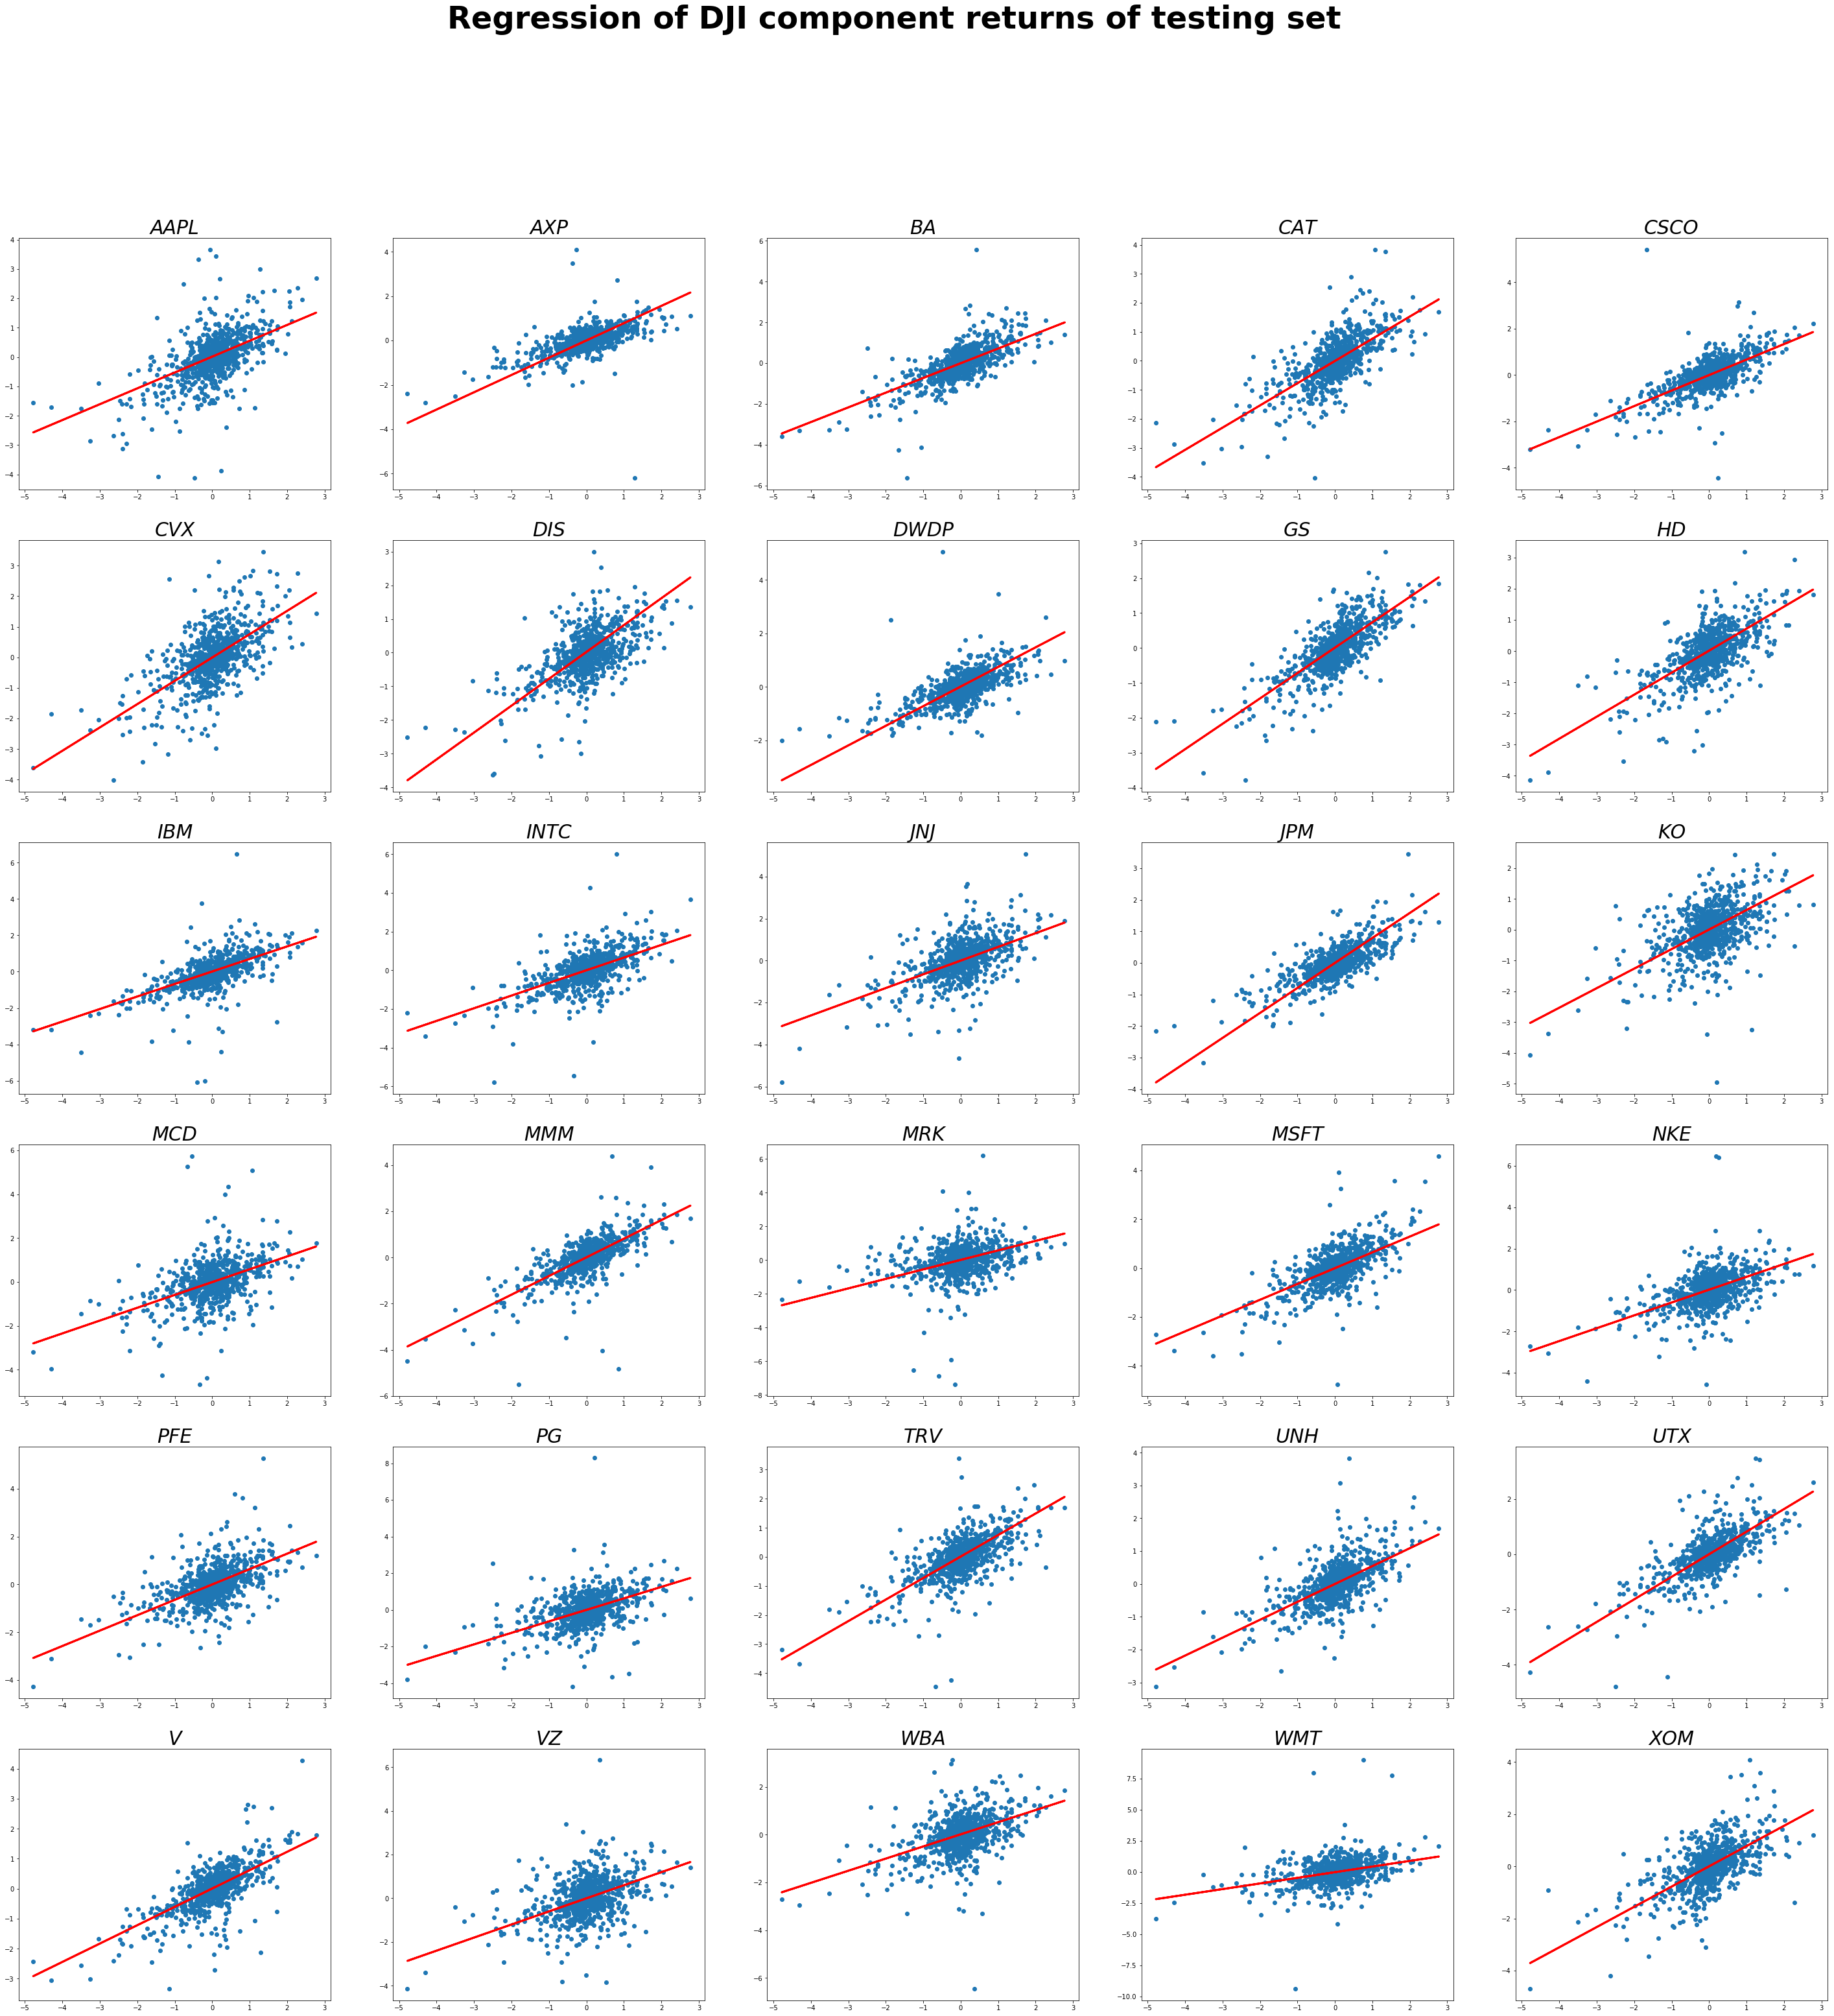

In [21]:
fig, ax_list = plt.subplots(6, 5, figsize=(50,50))
plt.suptitle("Regression of DJI component returns of testing set", fontsize = 48, fontweight='bold')

x_axis = df_test['DJI'].values.reshape((756, 1))
for i, stock in enumerate(tickers):
    lr.fit(df_train['DJI'].values.reshape((1761, 1)), df_train[stock].values.reshape((1761, 1)))
    alphas[i] = lr.intercept_[0]
    betas[i] = lr.coef_[0][0]
           
    predictions = lr.predict(df_train['DJI'].values.reshape((1761, 1)))
    r2_in_sample[i] = r2_score(df_train[stock], predictions)
    
    predictions = lr.predict(df_test['DJI'].values.reshape((756, 1)))
    r2_out_sample[i] = r2_score(df_test[stock], predictions)
    
    ax_list[int(i/5)][i%5].set_title('{}'.format(stock), fontstyle='italic', fontsize = 30)
    ax_list[int(i/5)][i%5].scatter(x_axis, df_test[stock].values.reshape((756, 1)))
    ax_list[int(i/5)][i%5].plot(x_axis, predictions, color='red', linewidth=3)
    
plt.show()
# R2 score: https://en.wikipedia.org/wiki/Coefficient_of_determination

In [22]:
lr.fit(df_train['DJI'].values.reshape((1761, 1)), df_train['AAPL'].values.reshape((1761, 1)))
alpha = lr.intercept_[0]
beta = lr.coef_[0][0]
predictions = lr.predict(df_train['DJI'].values.reshape((1761, 1)))

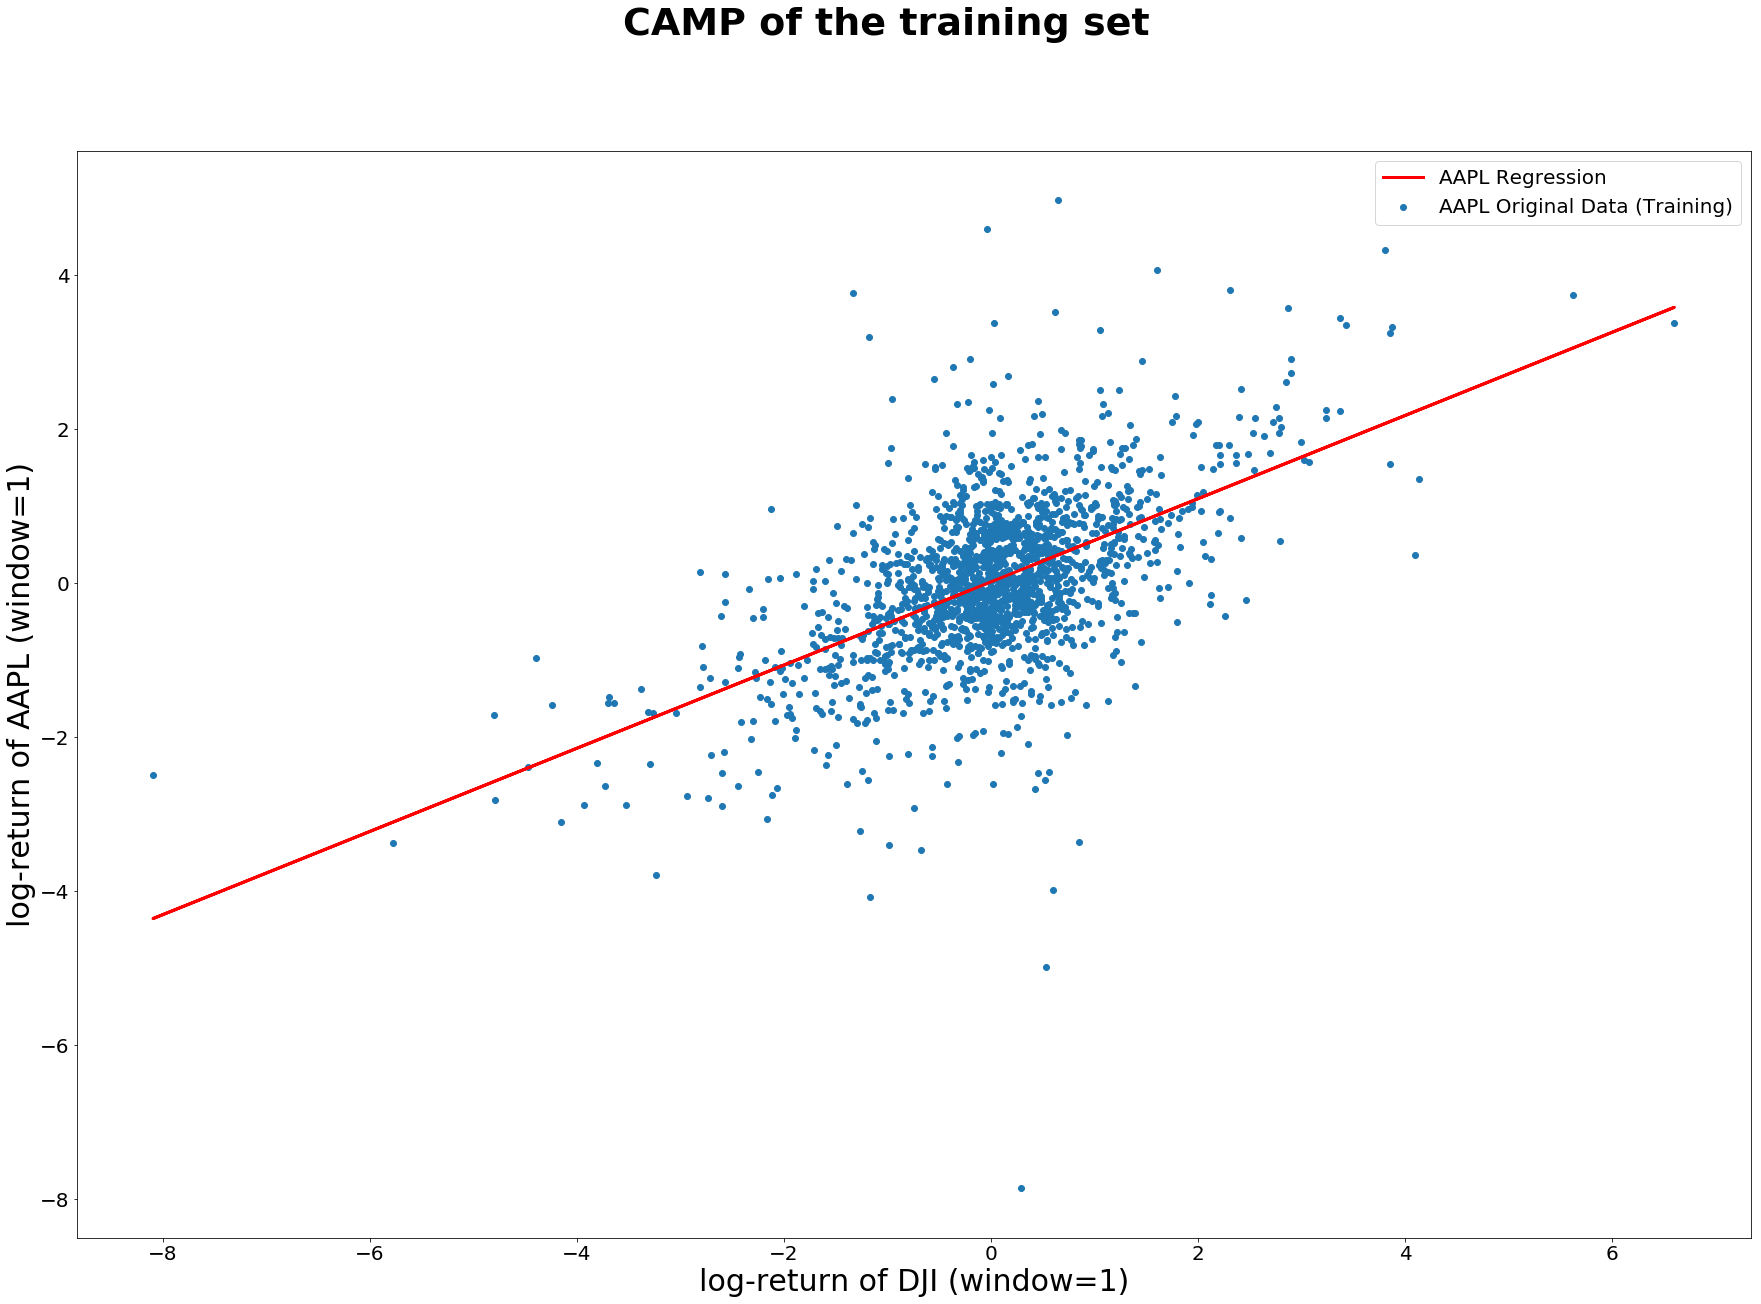

In [23]:
fig, ax_list = plt.subplots(1, 1, figsize=(30,20))
plt.suptitle("CAMP of the training set", fontsize = 38, fontweight='bold')
ax_list.scatter(df_train['DJI'].values.reshape((1761, 1)), df_train['AAPL'].values.reshape((1761, 1)), label='AAPL Original Data (Training)')
ax_list.plot(df_train['DJI'].values.reshape((1761, 1)), predictions, label='AAPL Regression', color='red', linewidth=3)
plt.xlabel("log-return of DJI (window=1)", fontsize=30)
plt.ylabel("log-return of AAPL (window=1)", fontsize=30)
ax_list.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.show()

In [24]:
lr.fit(df_train['DJI'].values.reshape((1761, 1)), df_train['AAPL'].values.reshape((1761, 1)))
alpha = lr.intercept_[0]
beta = lr.coef_[0][0]
predictions = lr.predict(df_test['DJI'].values.reshape((756, 1)))

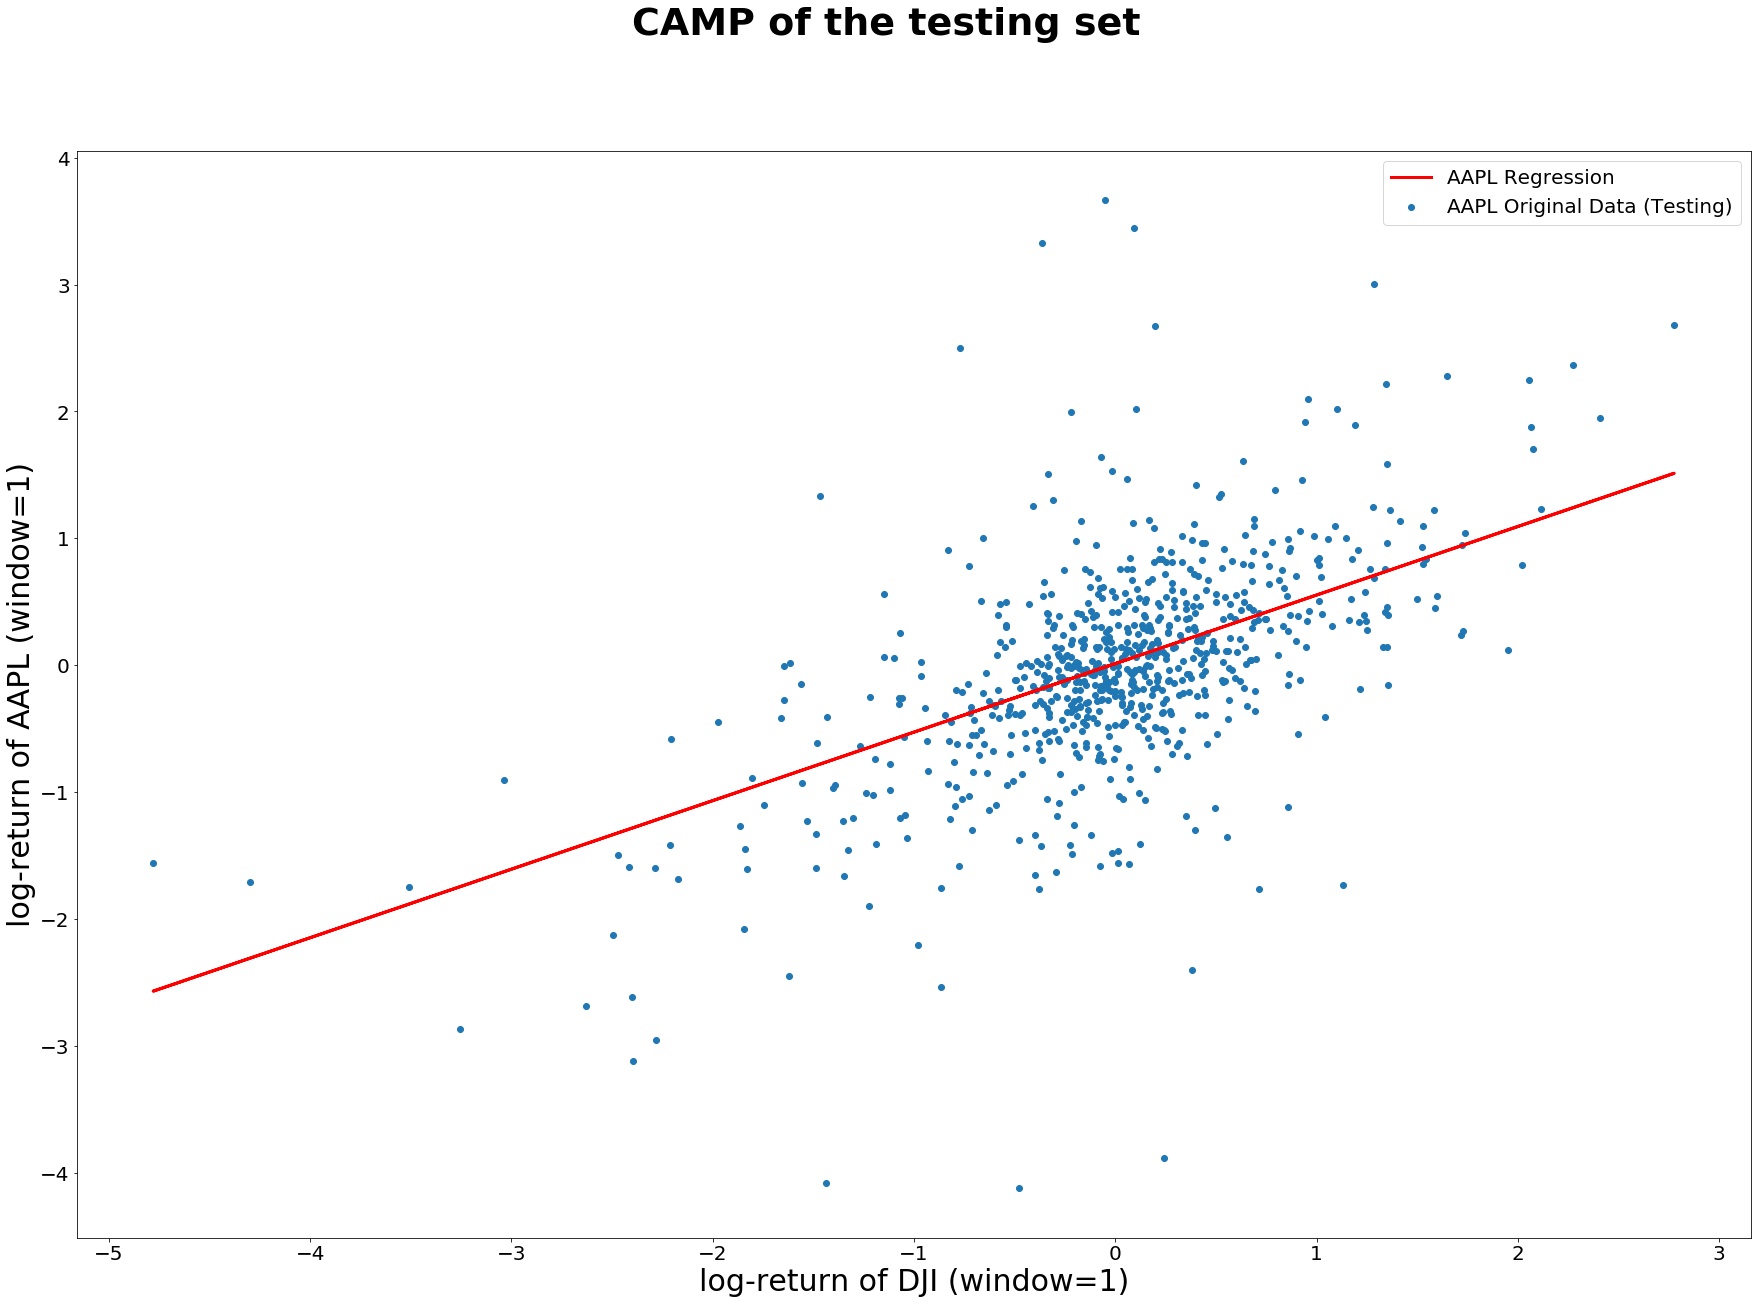

In [25]:
#date = np.array([datetime.datetime.strptime(t, '%Y-%m-%d').date() for t in np.array(df_train.index)])

fig, ax_list = plt.subplots(1, 1, figsize=(30,20))
plt.suptitle("CAMP of the testing set", fontsize = 38, fontweight='bold')
ax_list.scatter(df_test['DJI'].values.reshape((756, 1)), df_test['AAPL'].values.reshape((756, 1)), label='AAPL Original Data (Testing)')
ax_list.plot(df_test['DJI'].values.reshape((756, 1)), predictions, label='AAPL Regression', color='red', linewidth=3)
plt.xlabel("log-return of DJI (window=1)", fontsize=30)
plt.ylabel("log-return of AAPL (window=1)", fontsize=30)
ax_list.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.show()

### model scores and interpretation

In [26]:
df_results = pd.DataFrame({'Alpha':alphas, 'Beta':betas, 'R2 in-sample':r2_in_sample, 'R2 out-sample':r2_out_sample},
                          index=tickers)
df_results

,Alpha,Beta,R2 in-sample,R2 out-sample
AAPL,0.012884,0.540214,0.302781,0.323307
AXP,0.002493,0.778564,0.555189,0.210315
BA,-0.004761,0.721516,0.561934,0.509038
CAT,-0.005464,0.765893,0.609088,0.494331
CSCO,-0.006435,0.669297,0.445433,0.459051
CVX,-0.004447,0.762649,0.639511,0.361433
DIS,0.020287,0.797565,0.617386,0.267576
DWDP,0.007085,0.733037,0.498082,0.329535
GS,0.008293,0.726647,0.511405,0.566066
HD,0.014941,0.706463,0.501144,0.411090


In [27]:
df_test.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-24,0.504823,-0.436185,0.076354,0.247754,-0.369226,1.020990,-0.858538,0.296004,-0.153480,0.527485,...,0.606315,-0.148630,0.472668,-0.592370,-0.299010,0.354795,0.732722,-0.513238,1.581580,0.067955
2015-11-25,-0.484795,0.009493,-0.540500,0.039683,-0.088518,-0.379988,0.358623,-1.276099,0.103440,0.496387,...,-0.724206,-0.426221,0.564813,-0.098704,-0.231526,-0.539171,0.318528,0.443558,-0.617128,-0.035409
2015-11-27,-0.170627,0.076081,-0.243084,-0.217741,0.149865,-0.397403,-2.037950,0.052032,0.317659,-0.010774,...,-0.273268,-0.001148,-0.096416,-0.394278,0.155551,0.564125,0.543823,-0.527945,-0.018348,-0.042186
2015-11-30,0.185322,-0.170569,-0.661077,0.990044,-0.175093,0.719068,-0.999390,0.077865,-0.134697,-0.511626,...,-1.138107,-0.205101,-0.898473,-0.615611,-0.688977,0.390513,-0.139434,-1.561061,0.424132,-0.570929
2015-12-01,-0.542321,0.341900,0.884637,-0.796187,0.666562,0.870385,1.063255,1.075847,0.752998,0.232279,...,1.422486,0.651635,1.748691,0.479754,0.628118,0.219403,-0.058906,0.201390,0.226583,0.908583


In [28]:
# df_test - df_results.Alpha works cuz df_results.index==df_test.columns.values is True; otherwise new columns will be created
df_market = pd.DataFrame(index=df_test.index,
                         columns=tickers,
                         data=np.vstack([df_test.DJI.values]*30).T)
df_unexplained = df_test.iloc[:,:-1] - df_results.Alpha - df_results.Beta * df_market
df_unexplained.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PFE,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-24,0.455229,-0.491586,0.032085,0.201171,-0.408273,0.973611,-0.933024,0.239106,-0.211152,0.464537,...,1.502024,0.568514,-0.208769,0.437811,-0.648288,-0.347430,0.316328,0.685199,-0.530030,1.526876
2015-11-25,-0.478551,0.034568,-0.510192,0.072266,-0.058384,-0.348536,0.366576,-1.257228,0.120877,0.506461,...,2.155896,-0.697190,-0.409845,0.586315,-0.070164,-0.216709,-0.515800,0.323531,0.473570,-0.591567
2015-11-27,-0.160723,0.106432,-0.207885,-0.179968,0.184535,-0.360783,-2.024592,0.075870,0.340020,0.004087,...,-0.192046,-0.242002,0.020244,-0.071220,-0.360201,0.174514,0.591551,0.552270,-0.494865,0.012475
2015-11-30,0.480861,0.271443,-0.244382,1.432778,0.213463,1.158934,-0.564324,0.489292,0.271873,-0.123227,...,0.290496,-0.775276,0.207693,-0.584981,-0.149501,-0.346533,0.734264,0.137707,-1.288560,0.865538
2015-12-01,-1.046035,-0.367984,0.233841,-1.486601,0.064885,0.181903,0.318313,0.402737,0.084486,-0.424542,...,1.380577,0.857543,-0.030779,1.255484,-0.263035,0.065408,-0.321978,-0.533613,-0.196048,-0.480892


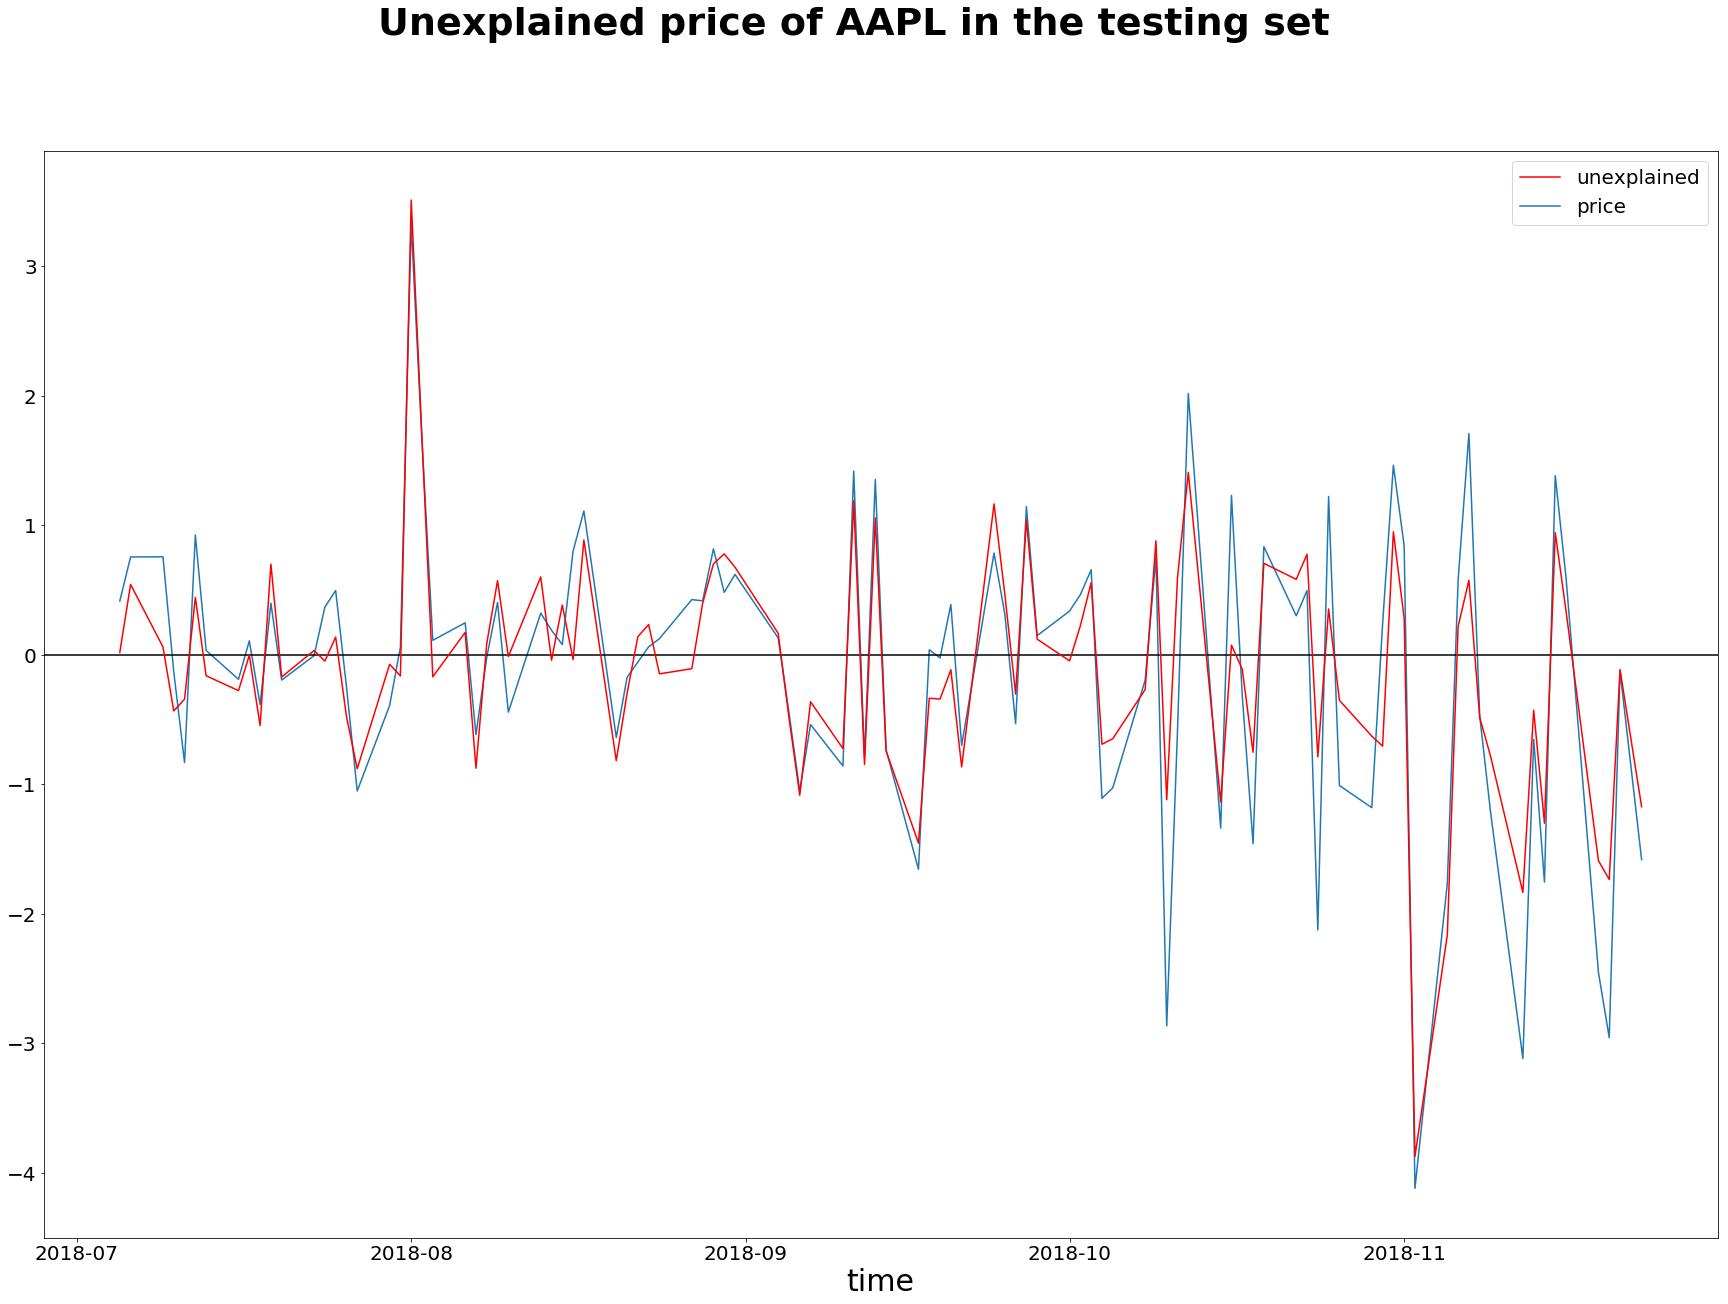

In [29]:
time = np.array([datetime.datetime.strptime(t, '%Y-%m-%d').date() for t in np.array(df_unexplained.index)])
fig, ax_list = plt.subplots(1, 1, figsize=(30,20))
plt.suptitle("Unexplained price of AAPL in the testing set", fontsize = 38, fontweight='bold')
ax_list.plot(time[-100:], df_unexplained['AAPL'].values.reshape((756, 1))[-100:], color='red', label='unexplained', zorder=5)
ax_list.plot(time[-100:], df_test['AAPL'].values.reshape((756, 1))[-100:], label='price')
ax_list.axhline(y=0, color='black')
plt.xlabel("time", fontsize=30)
ax_list.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.show()

### window = 30

In [30]:
asset_returns_30 = (np.log(asset_prices) - np.log(asset_prices.shift(30))).iloc[30:,:]
asset_returns_30.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-08,-0.002692,-0.055327,0.094529,0.191725,0.067203,-0.000808,0.031045,-0.123756,0.236521,0.129848,...,-0.068297,0.038870,0.336922,0.085806,0.114649,0.085694,0.106437,-0.026694,0.003673,0.034808
2009-01-09,-0.002424,-0.105517,0.100996,0.147652,0.079743,-0.049692,0.012630,-0.120470,0.156258,0.069861,...,-0.053979,0.037127,0.243674,0.111706,0.115964,0.050379,0.093744,-0.058364,-0.006937,0.014019
2009-01-12,-0.069067,-0.169135,0.057885,0.046208,0.000610,-0.121010,-0.028857,-0.160788,0.015178,-0.024937,...,-0.052327,-0.041767,0.199804,0.092583,0.018293,-0.023319,0.052717,-0.098154,-0.055277,-0.029378
2009-01-13,-0.055011,-0.204970,-0.003996,0.009953,-0.005456,-0.095411,-0.060403,-0.154453,-0.013639,-0.026306,...,-0.078865,-0.043546,0.188175,0.045714,0.010975,-0.035856,0.052364,-0.069658,-0.028217,-0.044050
2009-01-14,-0.041325,-0.096686,0.032563,0.072994,0.050825,-0.032887,0.022855,-0.149162,0.140634,0.032470,...,-0.044452,0.077691,0.179667,0.092277,0.058995,-0.003590,0.125367,-0.027734,0.010575,0.006245


In [31]:
standardized_asset_returns_30 = StandardScaler().fit_transform(asset_returns_30.values)
standardized_asset_returns_30 = pd.DataFrame(data=standardized_asset_returns_30,
                                         index=asset_returns_30.index,
                                         columns=asset_returns_30.columns.values)
standardized_asset_returns_30.head()

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-08,-0.407410,-0.710198,0.803036,1.618366,0.686365,-0.090023,0.151181,-1.012911,2.329023,1.490952,...,-1.404959,0.438560,3.953919,1.078040,1.303396,1.362593,1.088873,-0.595475,0.060968,0.481926
2009-01-09,-0.404361,-1.183960,0.878592,1.218365,0.842998,-0.815836,-0.092847,-0.989356,1.494086,0.641813,...,-1.128572,0.408741,2.755753,1.452796,1.323255,0.747038,0.939651,-1.154853,-0.124085,0.024280
2009-01-12,-1.160920,-1.784489,0.374885,0.297676,-0.145380,-1.874729,-0.642618,-1.278361,0.026508,-0.700097,...,-1.096680,-0.940460,2.192046,1.176099,-0.151984,-0.537569,0.457365,-1.857652,-0.967127,-0.931057
2009-01-13,-1.001351,-2.122749,-0.348130,-0.031370,-0.221147,-1.494656,-1.060656,-1.232951,-0.273260,-0.719475,...,-1.608948,-0.970884,2.042620,0.497936,-0.262526,-0.756100,0.453216,-1.354330,-0.495207,-1.254054
2009-01-14,-0.845978,-1.100604,0.079027,0.540785,0.481811,-0.566320,0.042659,-1.195024,1.331560,0.112527,...,-0.944659,1.102456,1.933306,1.171668,0.462784,-0.193689,1.311399,-0.613853,0.181331,-0.146855


In [32]:
df_train = standardized_asset_returns_30.iloc[:int(standardized_asset_returns_30.shape[0]*0.7), :]
df_test = standardized_asset_returns_30.iloc[int(standardized_asset_returns_30.shape[0]*0.7):, :]
print("dimensions of training set: ", df_train.shape)
print("dimensions of testing set: ", df_test.shape)
df_test.head()

dimensions of training set:  (1741, 31)
dimensions of testing set:  (747, 31)


,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,DWDP,GS,HD,...,PG,TRV,UNH,UTX,V,VZ,WBA,WMT,XOM,DJI
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-08,-0.089997,-0.748840,-0.438437,-0.776738,-0.954773,-0.472947,-0.382179,-0.062171,-0.361417,0.619022,...,-0.021932,-0.286947,-0.447172,-1.056705,-0.257313,-0.381044,-0.952942,0.353528,-1.478856,-0.353206
2015-12-09,-0.271298,-0.732663,-0.638375,-0.718537,-1.192568,-0.094968,-0.530860,0.711376,-0.448852,0.473617,...,0.015536,-0.587347,-0.848938,-0.871245,-0.358307,-0.439626,-1.721473,0.375885,-1.218785,-0.396215
2015-12-10,-0.675813,-0.754896,-0.418169,-0.855514,-1.306469,-0.159276,-0.681763,0.351864,-0.644606,0.616251,...,0.233678,-0.722746,-0.764091,-0.980121,-0.572605,-0.571648,-0.375994,0.454768,-1.459028,-0.539341
2015-12-11,-1.091127,-0.895506,-0.506459,-0.986342,-1.500426,-0.659105,-1.092138,0.213839,-0.888520,0.411911,...,0.102952,-0.917813,-0.782036,-1.028862,-0.897216,-0.734997,-0.470461,0.297571,-1.762294,-0.901135
2015-12-14,-1.064128,-0.776728,-0.708520,-1.018858,-1.218931,-0.333445,-0.781822,-0.178735,-0.766192,0.580126,...,0.390181,-0.510294,-0.587597,-0.977000,-0.567155,-0.671084,-0.460390,0.822206,-1.478093,-0.655143


In [33]:
lr.fit(df_train['DJI'].values.reshape((1741, 1)), df_train['MMM'].values.reshape((1741, 1)))
alpha = lr.intercept_[0]
beta = lr.coef_[0][0]

predictions = lr.predict(df_train['DJI'].values.reshape((1741, 1)))
r2_in_sample = r2_score(df_train['MMM'], predictions)
    
predictions = lr.predict(df_test['DJI'].values.reshape((747, 1)))
r2_out_sample = r2_score(df_test['MMM'], predictions)

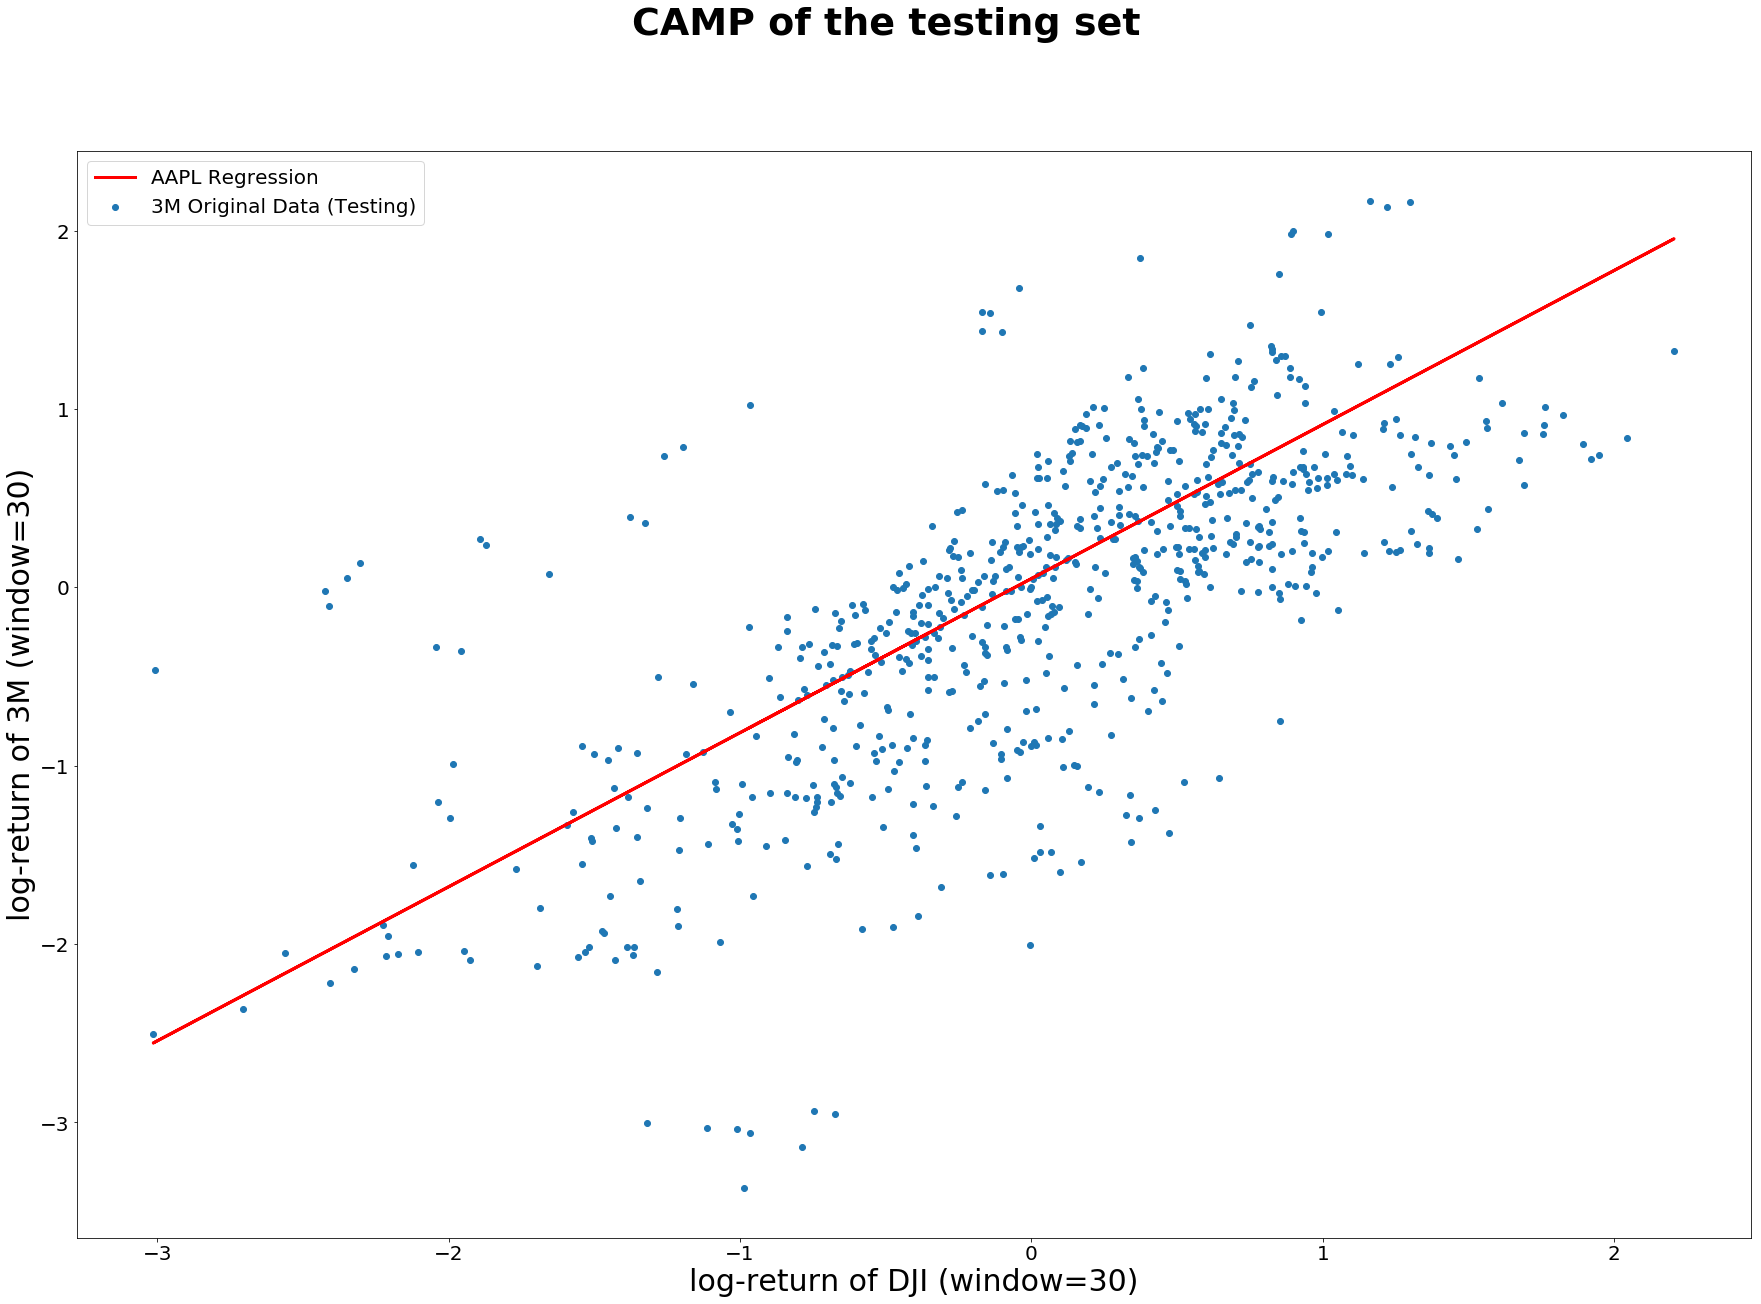

In [34]:
fig, ax_list = plt.subplots(1, 1, figsize=(30,20))
plt.suptitle("CAMP of the testing set", fontsize = 38, fontweight='bold')
ax_list.scatter(df_test['DJI'].values.reshape((747, 1)), df_test['MMM'].values.reshape((747, 1)), label='3M Original Data (Testing)')
ax_list.plot(df_test['DJI'].values.reshape((747, 1)), predictions, label='AAPL Regression', color='red', linewidth=3)
plt.xlabel("log-return of DJI (window=30)", fontsize=30)
plt.ylabel("log-return of 3M (window=30)", fontsize=30)
ax_list.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.show()

In [35]:
df_results_compare = pd.DataFrame({'Alpha':alpha, 'Beta':beta, 'R2 in-sample':r2_in_sample, 'R2 out-sample':r2_out_sample},
                                  index=[0])
df_results_compare.loc[-1] = df_results.loc['MMM',:]
df_results_compare.rename(index={0:'MMM_30', -1:'MMM_1'}, inplace=True)
#df_results_compare.index(index=['MMM_30', 'MMM_1'])
df_results_compare

,Alpha,Beta,R2 in-sample,R2 out-sample
MMM_30,0.049009,0.863939,0.78020,0.439117
MMM_1,0.005207,0.806897,0.67894,0.520118


In [36]:
alpha = df_results_compare.iloc[0,0]
beta = df_results_compare.iloc[0,1]
mmm = np.array(df_test.MMM)
market = np.array(df_test.DJI)
epsilon = mmm - alpha - beta * market

df_unexplained_compare = pd.DataFrame(index=df_test.index,
                                      columns=['MMM_30'],
                                      data=epsilon)
df_unexplained_compare['MMM_1'] = df_unexplained['MMM']
df_unexplained_compare.head()

,MMM_30,MMM_1
Date,,
2015-12-08,0.051045,0.269814
2015-12-09,-0.005429,-0.020754
2015-12-10,0.130814,0.336059
2015-12-11,0.218954,0.106190
2015-12-14,0.328790,0.893078


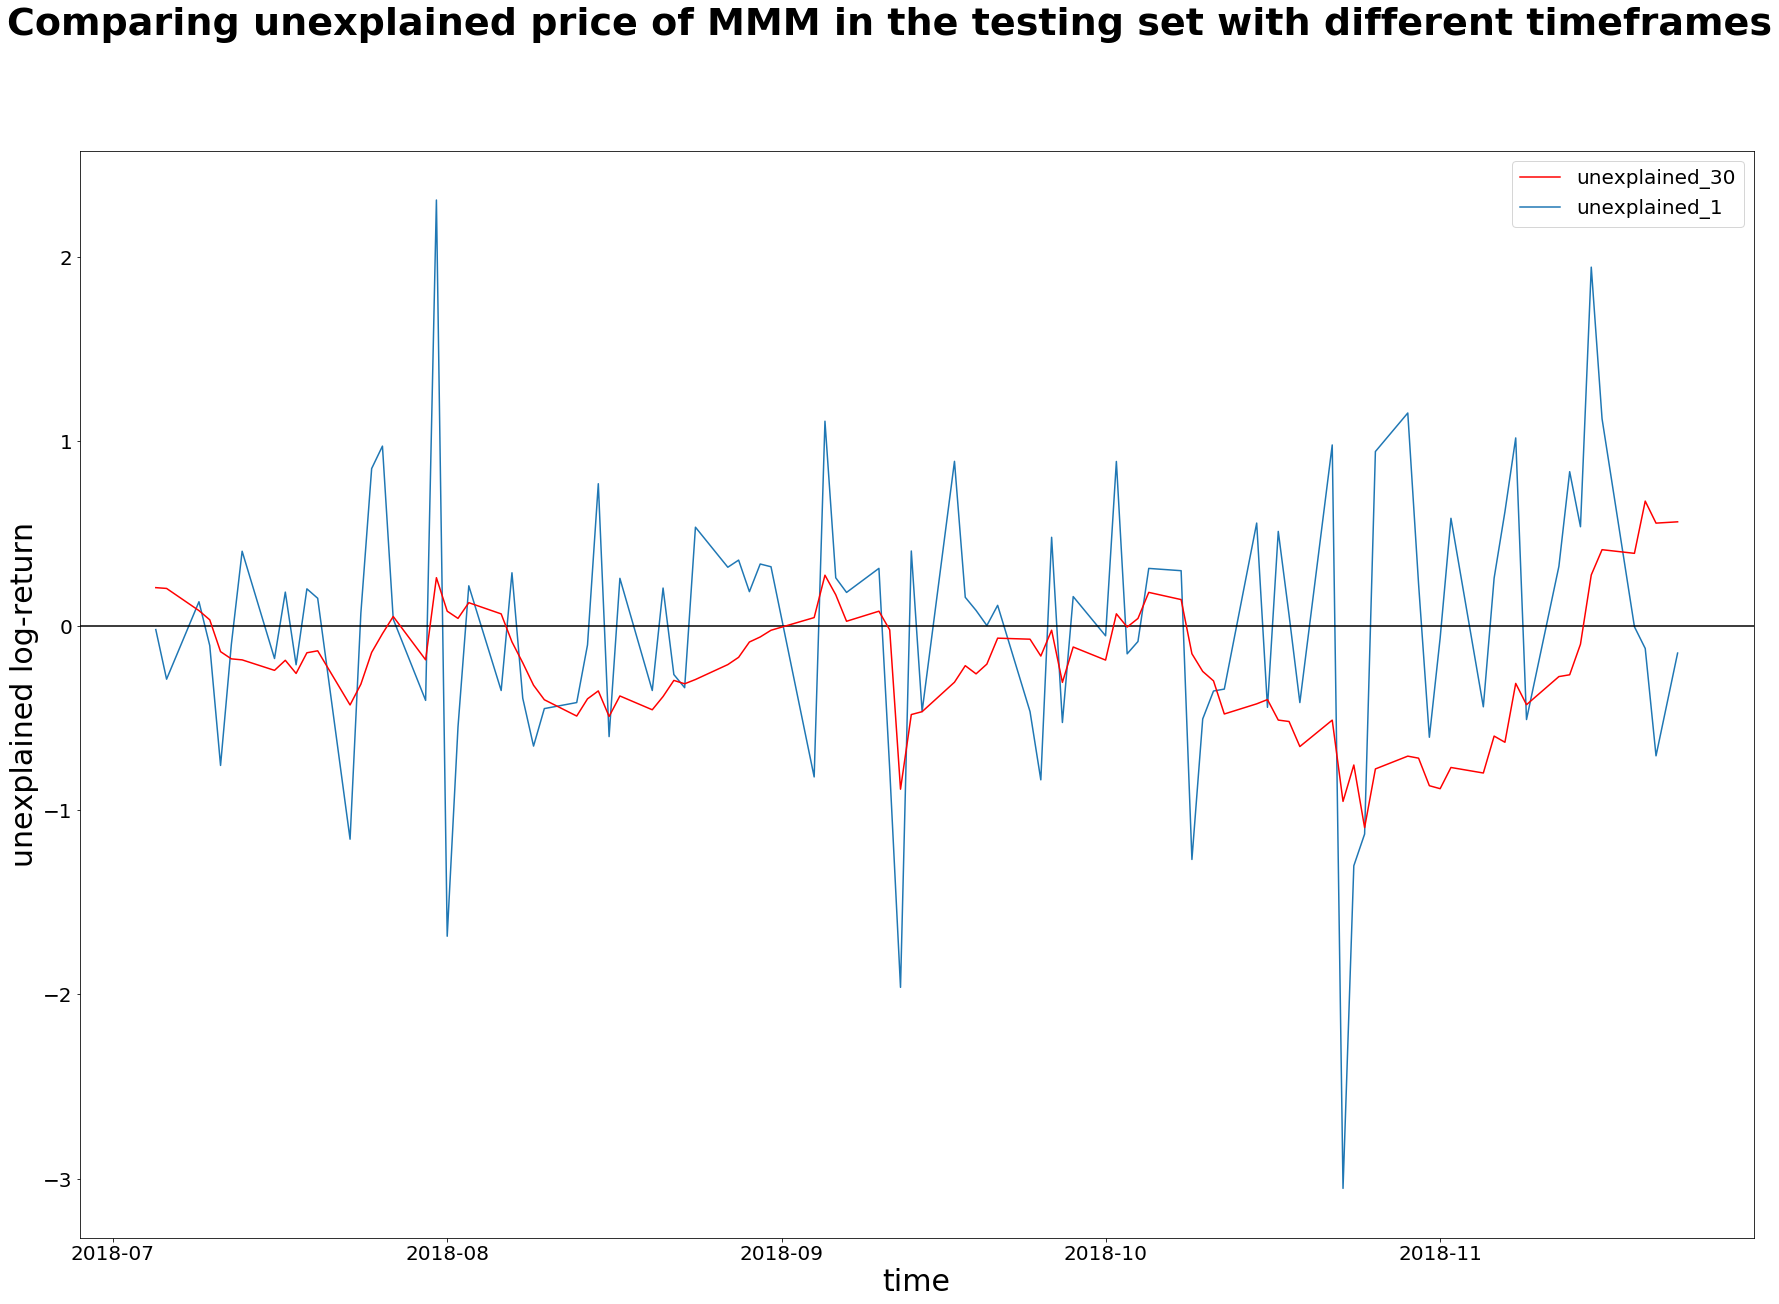

In [37]:
time = np.array([datetime.datetime.strptime(t, '%Y-%m-%d').date() for t in np.array(df_unexplained_compare.index)])
fig, ax_list = plt.subplots(1, 1, figsize=(30,20))
plt.suptitle("Comparing unexplained price of MMM in the testing set with different timeframes", fontsize = 38, fontweight='bold')
ax_list.plot(time[-100:], df_unexplained_compare['MMM_30'].values[-100:], color='red', label='unexplained_30', zorder=5)
ax_list.plot(time[-100:], df_unexplained_compare['MMM_1'].values[-100:], label='unexplained_1')
ax_list.axhline(y=0, color='black')
plt.xlabel("time", fontsize=30)
plt.ylabel("unexplained log-return", fontsize=30)
ax_list.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.show()

In [38]:
df_test.MMM[(df_test.index>='2018-10-01') & (df_test.index<'2018-11-20')]

Date
2018-10-01    0.330475
2018-10-02    0.602732
2018-10-03    0.522685
2018-10-04    0.491776
2018-10-05    0.560705
2018-10-08    0.451536
2018-10-09   -0.072987
2018-10-10   -0.787549
2018-10-11   -1.292950
2018-10-12   -1.155324
2018-10-15   -1.151371
2018-10-16   -0.710975
2018-10-17   -0.906377
2018-10-18   -1.173102
2018-10-19   -1.202230
2018-10-22   -1.110311
2018-10-23   -1.729749
2018-10-24   -2.017366
2018-10-25   -2.156320
2018-10-26   -2.071316
2018-10-29   -2.124472
2018-10-30   -1.936912
2018-10-31   -2.017574
2018-11-01   -2.014245
2018-11-02   -2.043344
2018-11-05   -1.800743
2018-11-06   -1.421338
2018-11-07   -0.977582
2018-11-08   -0.689703
2018-11-09   -0.965567
2018-11-12   -1.397106
2018-11-13   -1.550308
2018-11-14   -1.578596
2018-11-15   -0.902190
2018-11-16   -0.542912
2018-11-19   -0.889762
Name: MMM, dtype: float64

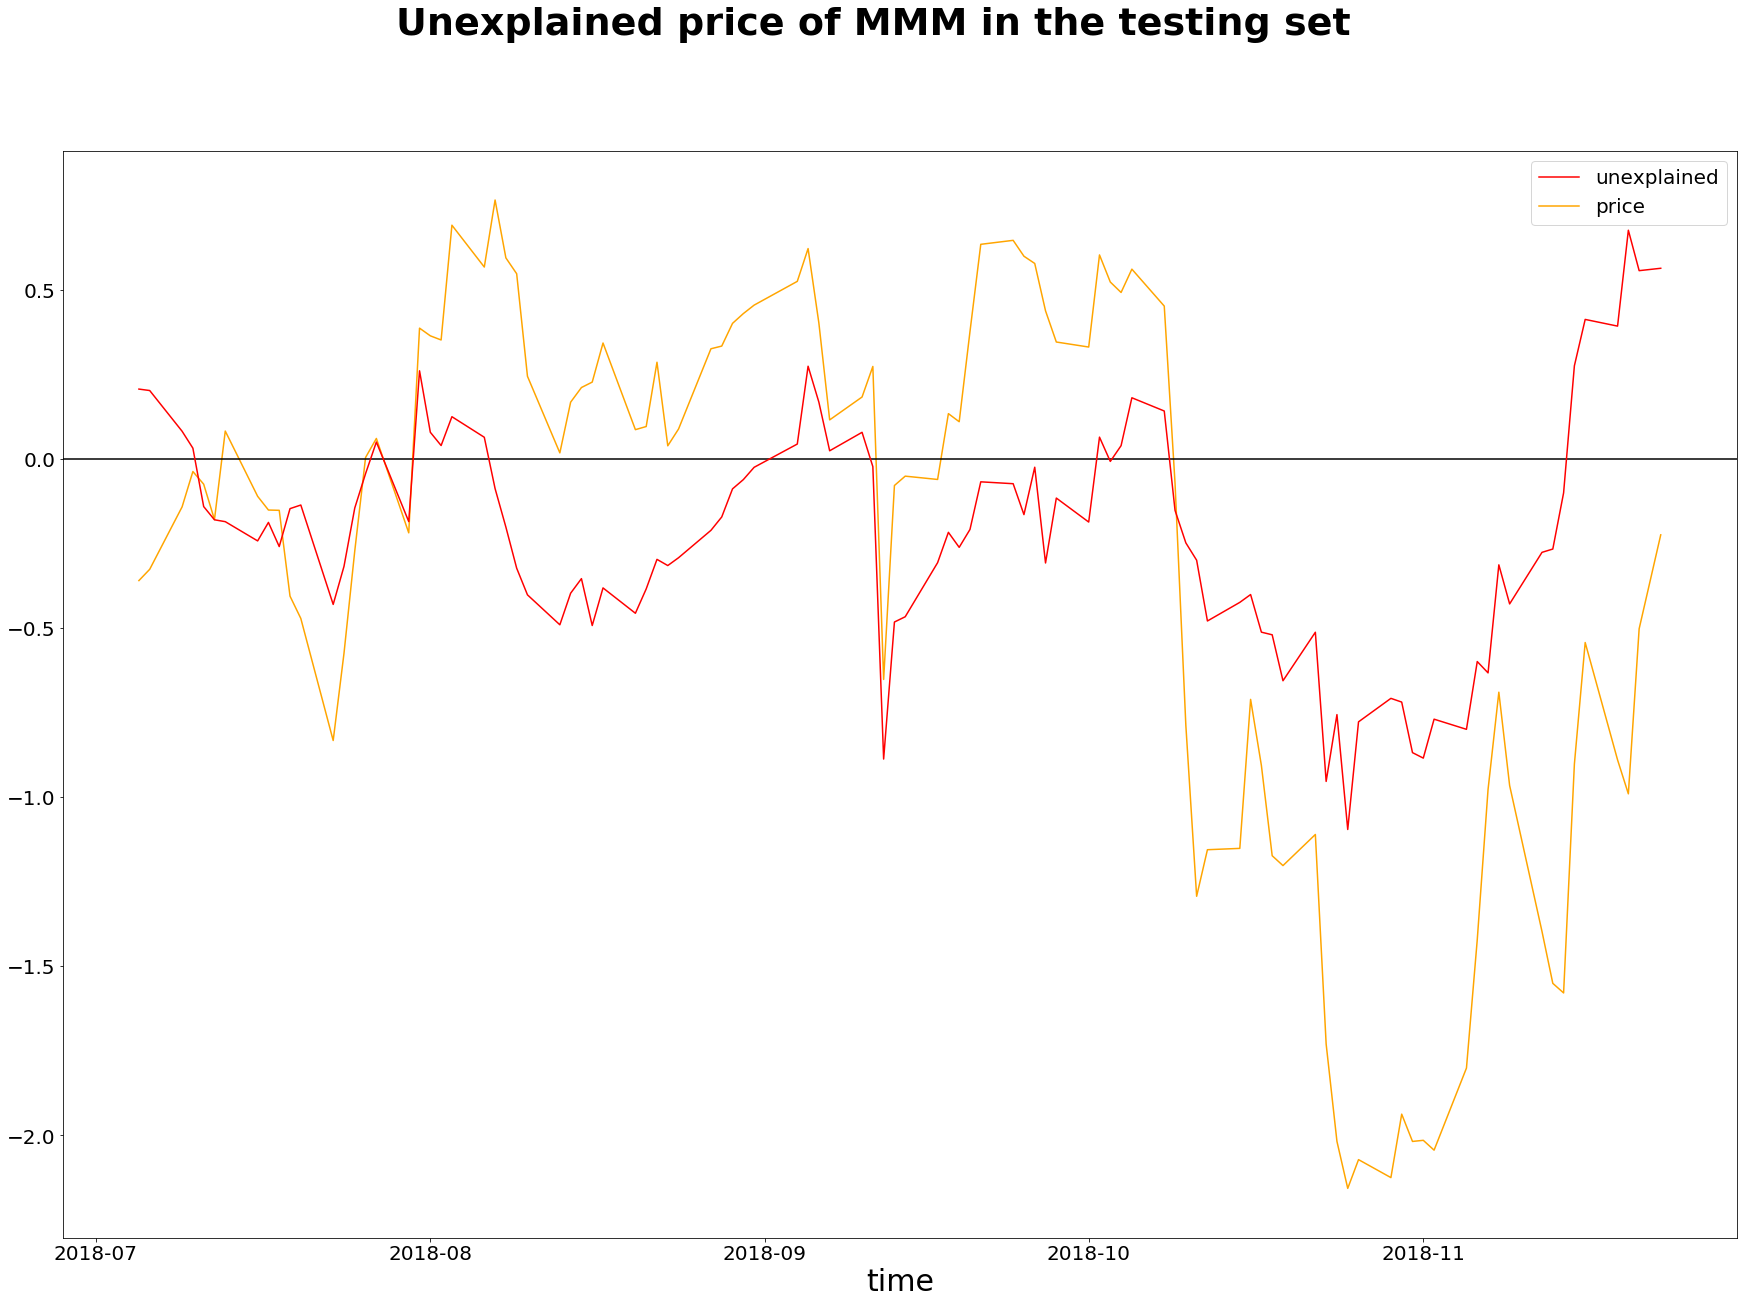

In [39]:
time = np.array([datetime.datetime.strptime(t, '%Y-%m-%d').date() for t in np.array(df_unexplained_compare.index)])
fig, ax_list = plt.subplots(1, 1, figsize=(30,20))
plt.suptitle("Unexplained price of MMM in the testing set", fontsize = 38, fontweight='bold')
ax_list.plot(time[-100:], df_unexplained_compare['MMM_30'].values.reshape((747, 1))[-100:], color='red', label='unexplained', zorder=5)
ax_list.plot(time[-100:], df_test['MMM'].values.reshape((747, 1))[-100:], color='orange', label='price')
ax_list.axhline(y=0, color='black')
plt.xlabel("time", fontsize=30)
ax_list.tick_params(labelsize=20)
plt.legend(fontsize=20)
plt.show()